In [1]:
from ema_workbench import (MultiprocessingEvaluator,SequentialEvaluator, ema_logging, save_results, load_results)
from SALib.analyze import sobol
from ema_workbench.em_framework.evaluators import SOBOL
from ema_workbench.em_framework.salib_samplers import get_SALib_problem
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ema_problem_definitions import ema_problem

In [7]:
# import problem definition
model = ema_problem(2)

In [3]:
experiment_SOBOL, outcomes_SOBOL = load_results('../data/ema/sobol_results.tar.gz')

In [5]:
# prepare SOBOL from results
def get_sobol_results(variable):
    problem = get_SALib_problem(model.uncertainties)
    Si = sobol.analyze(problem, outcomes_SOBOL[variable],
                    calc_second_order=True, print_to_console=False)
    scores_filtered = {k:Si[k] for k in ['ST','ST_conf','S1','S1_conf']}
    Si_df = pd.DataFrame(scores_filtered, index=problem['names'])

    sns.set_style('white')
    fig, ax = plt.subplots(1)

    indices = Si_df[['S1','ST']]
    err = Si_df[['S1_conf','ST_conf']]

    indices.plot.bar(yerr=err.values.T,ax=ax)
    fig.set_size_inches(8,6)
    fig.subplots_adjust(bottom=0.3), 25
    plt.show()

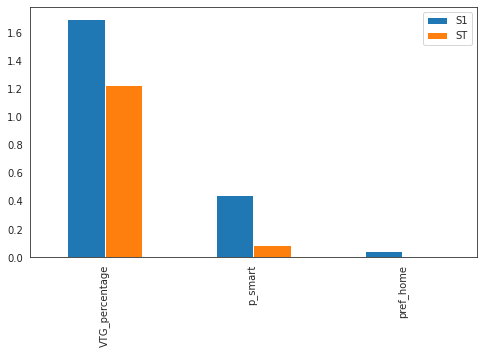

In [8]:
get_sobol_results('mean_VTG_capacity')